## Setting Up

In [1]:
from tensorflow.keras import backend as K
# GPU 메모리 해제
K.clear_session()

2023-11-30 03:13:44.419117: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 03:13:44.419175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 03:13:44.419226: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 03:13:44.431860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# tensorflow device 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-11-30 03:13:47.568523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /device:GPU:0 with 18289 MB memory:  -> device: 0, name: NVIDIA RTX 4000 Ada Generation, pci bus id: 0000:05:00.0, compute capability: 8.9


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8184839979901428206
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 19178061824
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3563988007330748714
 physical_device_desc: "device: 0, name: NVIDIA RTX 4000 Ada Generation, pci bus id: 0000:05:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [1]:
!pip install keras-nlp==0.6.2
!pip install tensorflow==2.14.0

  Obtaining dependency information for keras-nlp==0.6.2 from https://files.pythonhosted.org/packages/37/d4/dfd85606db811af2138e97fc480eb7ed709042dd96dd453868bede0929fe/keras_nlp-0.6.2-py3-none-any.whl.metadata
  Obtaining dependency information for keras-core from https://files.pythonhosted.org/packages/95/f7/b8dcff937ea64f822f0d3fe8c6010793406b82d14467cd0e9eecea458a40/keras_core-0.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for regex from https://files.pythonhosted.org/packages/f2/b8/b1ec82fce93064a73ba67f2bb158ec9cac4a0e8f0b6942268ec963947329/regex-2023.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 14.8 MB/s e

In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/08/de/d4448c423484537ebc9373d3da2496a2e47f42ea11ff48e025cf49665471/pandas-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 57.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 54.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/6b/d4/d62ce38ba00dc67d7ec4ec5cc19d36958d8ed70e63778715ad626bcbc796/scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_nlp
from sklearn.model_selection import train_test_split

Using TensorFlow backend


In [4]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss over epochs from the training history object.

    Args:
    history (History): The history object returned by the fit function of a model in Keras.
    """

    # Extract training and validation accuracy and loss
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Extract the number of epochs
    epochs = range(1, len(train_acc) + 1)

    # Plotting Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting Loss
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

## Data Load

In [5]:
df = pd.read_csv('./IMDB Dataset (1).csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
X = df['review']
y = df['sentiment']
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=42)

In [7]:
# 레이블을 정수로 매핑
label_mapping = {'positive': 1, 'negative': 0}

# y_train과 y_test의 레이블을 정수로 변환
y_train_int = np.array([label_mapping[label] for label in y_train])
y_test_int = np.array([label_mapping[label] for label in y_test])


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_int, num_classes=2)
y_test = to_categorical(y_test_int, num_classes=2)

In [9]:
training_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

2023-11-30 03:14:06.245477: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 18289 MB memory:  -> device: 0, name: NVIDIA RTX 4000 Ada Generation, pci bus id: 0000:05:00.0, compute capability: 8.9


In [10]:
dataset_size = X_train.shape[0]
dataset_size

25000

## Fine tuning Bert-small


In [11]:
model_name =  "bert_small_en_uncased"

In [12]:
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    model_name,
    sequence_length=256,
)

In [13]:
batch_size = 32

In [14]:
train_cached = (
    training_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)
test_cached = (
    validation_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)

In [15]:
# Pretrained classifier.
bert_small = keras_nlp.models.BertClassifier.from_preset(
    model_name,
    preprocessor=None,
    num_classes=2,
    load_weights = True,
    activation='sigmoid'
)

In [16]:
bert_small.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),  
    jit_compile=True,
    metrics=["accuracy"],
)

In [18]:
bert_small.summary()

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ segment_ids (InputLayer)                      │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bert_backbone (BertBackbone)                  │ {sequence_output: (None, None, 512),   │      28,763,648 │
│                                               │ pooled_output: (None, 512)}            │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ dropout (Dropout)                             │ (None, 512)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,026 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 28,764,674 (109.73 MB)

 Trainable params: 28,764,674 (109.73 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
bert_backbone = bert_small.get_layer('bert_backbone')

# 모델의 각 레이어를 순회하며 파라미터 수를 계산
for layer in bert_backbone.layers:
    trainable_count = np.sum([tf.size(w).numpy() for w in layer.trainable_weights])
    non_trainable_count = np.sum([tf.size(w).numpy() for w in layer.non_trainable_weights])

    print(f"Layer: {layer.name}")
    print(f"  Trainable parameters: {trainable_count}")
    print(f"  Non-trainable parameters: {non_trainable_count}")

Layer: token_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: token_embedding
  Trainable parameters: 15627264
  Non-trainable parameters: 0.0
Layer: segment_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: position_embedding
  Trainable parameters: 262144
  Non-trainable parameters: 0.0
Layer: segment_embedding
  Trainable parameters: 1024
  Non-trainable parameters: 0.0
Layer: add
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: embeddings_layer_norm
  Trainable parameters: 1024
  Non-trainable parameters: 0.0
Layer: embeddings_dropout
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: padding_mask
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: transformer_layer_0
  Trainable parameters: 3152384
  Non-trainable parameters: 0.0
Layer: transformer_layer_1
  Trainable parameters: 3152384
  Non-trainable parameters: 0.0
Layer: transformer_layer_2
  Trainable parameters: 3152384
  Non-trainab

Epoch 1/10


2023-11-25 04:47:11.769254: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efcf0003960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-25 04:47:11.769279: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4500, Compute Capability 8.6
2023-11-25 04:47:11.912606: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-25 04:47:12.099164: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:59] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. bert_classifier_1/bert_backbone_1/embeddings_dropout/dropout/random_uniform/RandomUniform
2023-11-25 04:47:13.000039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2023-11-25 04:47:13.19

  1/782 [..............................] - ETA: 2:07:27 - loss: 0.7134 - accuracy: 0.5938

2023-11-25 04:47:17.817161: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


781/782 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8529

782/782 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.8530


Epoch 1: val_loss improved from inf to 0.27475, saving model to ./model/bert-small-IMDB-original-model
INFO:tensorflow:Assets written to: ./model/bert-small-IMDB-original-model/assets


INFO:tensorflow:Assets written to: ./model/bert-small-IMDB-original-model/assets


782/782 [==============================] - 141s 168ms/step - loss: 0.3366 - accuracy: 0.8530 - val_loss: 0.2747 - val_accuracy: 0.8906
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9233
Epoch 2: val_loss did not improve from 0.27475
782/782 [==============================] - 123s 157ms/step - loss: 0.1971 - accuracy: 0.9234 - val_loss: 0.3017 - val_accuracy: 0.8916
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.1224 - accuracy: 0.9565
Epoch 3: val_loss did not improve from 0.27475
782/782 [==============================] - 123s 157ms/step - loss: 0.1224 - accuracy: 0.9565 - val_loss: 0.3301 - val_accuracy: 0.8865
Epoch 4/10
781/782 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9728Restoring model weights from the end of the best epoch: 1.

Epoch 4: val_loss did not improve from 0.27475
782/782 [==============================] - 123s 157ms/step - loss: 0.0801 - accuracy: 0.9728 - val_loss: 0.

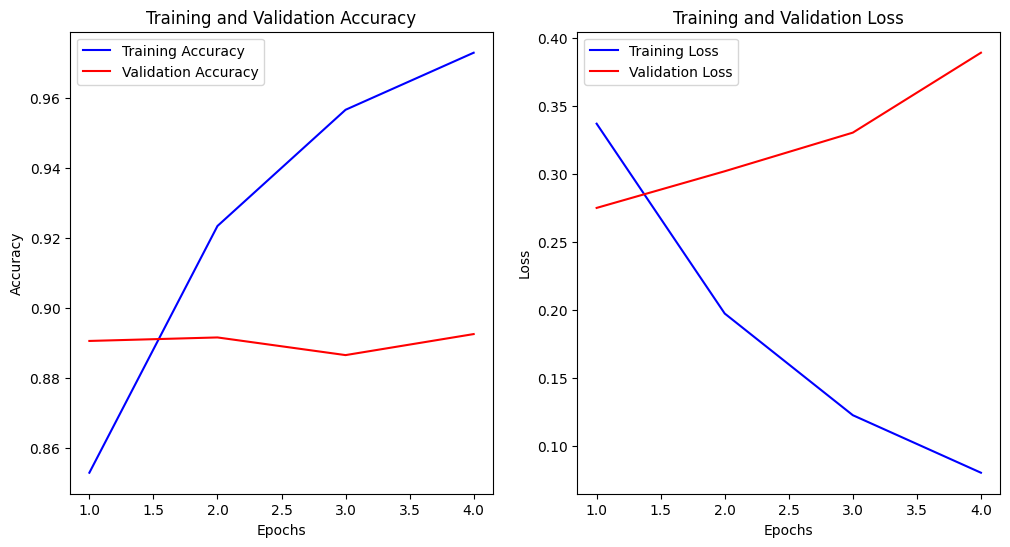

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 세트의 손실을 모니터링
    patience=3,         # 3 에포크 동안 개선이 없으면 조기 중단
    verbose=1,
    restore_best_weights=True  # 가장 좋은 모델의 가중치를 복원
)

# ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint(
    './model/bert-small-IMDB-original-model',   # 모델 파일 저장 경로
    monitor='val_loss',  # 검증 세트의 손실을 모니터링
    save_best_only=True,  # 가장 좋은 모델만 저장
    verbose=1
)

# 모델 훈련
history = bert_small.fit(
    train_cached, 
    validation_data=test_cached, 
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]  # 콜백 추가
)

# 훈련 과정 시각화
plot_training_history(history)


In [19]:
model_original = tf.keras.models.load_model("./model/bert-small-IMDB-original-model")

In [ ]:
model_original.evaluate(test_cached)

2023-11-30 03:12:49.511993: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


301/782 [==========>...................] - ETA: 1:09 - loss: 0.2725 - accuracy: 0.8886

# With LoRA Bert small

## Load Original Model (W) , Ensuring Weight Frozen

In [10]:
model_original = tf.keras.models.load_model("./model/bert-small-IMDB-original-model")

## Only With Weight Decay Method

### Define Dense LoRa and Einsum LoRa Class, (Only with Weight Decay Method0  

In [17]:
import math 

class DenseLoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)
    

    def build(self, input_shape):
        # LoRA weights.
        kernel_shape = self.original_layer.kernel.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )

        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.original_layer.units, self.rank),
            initializer='zeros',
            trainable=self.trainable,
        )
        #self.C_weight = self.add_weight(
        #    name="lora_C_weight",
        #    shape=(self.original_layer.units,),
        #    initializer='zeros',
        #    trainable=self.trainable,
        #)
        super().build(input_shape)

    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(self.A_weight, tf.transpose(inputs))  # Ax
            lora_output = tf.transpose(tf.matmul(self.B_weight, lora_A_output) * self._scale)  # BAx Transpose back to [batch_size, original_layer.units]
            original_output = self.original_layer(inputs) * self.decay_factor

            if training:
                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output + lora_output #  (1 - self.decay_factor) // 곱하기로도..

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                # Modify lora_output based on decay_factor
                #if tf.not_equal(self.decay_factor, 1.0):
                  #lora_output /= (1 - self.decay_factor) // 곱하기로도..
                return lora_output 

In [18]:
# EinsumLoraLayer_O
import math
from tensorflow import keras

class EinsumLoraLayer_O(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape= kernel_shape[:-1] + (self.rank,),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank, kernel_shape[-1]) ,
            initializer="zeros",
            trainable=self.trainable,
        )
        #self.C_weight = self.add_weight(
        #    name="lora_C_weight",
        #    shape= bias_shape ,
        #    initializer='zeros',
        #    trainable=self.trainable,
        #)
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.einsum(self.original_layer.equation, inputs , self.A_weight)
            lora_output = tf.matmul(lora_A_output, self.B_weight) * self._scale 
            original_output = self.original_layer(inputs) * self.decay_factor

            if training:
                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output + lora_output  #  (1 - self.decay_factor) // 곱하기로도..

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                # Modify lora_output based on decay_factor
                #if tf.not_equal(self.decay_factor, 1.0):
                  #lora_output /= (1 - self.decay_factor) // 곱하기로도..
                return lora_output 


In [19]:
#EinsumLoraLayer_QKV
import math
from tensorflow import keras

class EinsumLoraLayer_QKV(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank,) + kernel_shape[1:],
            initializer="zeros",
            trainable=self.trainable,
        )
        #self.C_weight = self.add_weight(
        #    name="lora_C_weight",
        #    shape= bias_shape ,
        #    initializer='zeros',
        #    trainable=self.trainable,
        #)
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(inputs, tf.transpose(self.A_weight)) #xA
            lora_output = tf.einsum(self.original_layer.equation, lora_A_output , self.B_weight) * self._scale  # BAx Transpose back to [batch_size, original_layer.units]
            original_output = self.original_layer(inputs) * self.decay_factor

            if training:
                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output + lora_output  #  (1 - self.decay_factor) // 곱하기로도..

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                # Modify lora_output based on decay_factor
                #if tf.not_equal(self.decay_factor, 1.0):
                  #lora_output /= (1 - self.decay_factor) // 곱하기로도..
                return lora_output 


### Creating LoRA Bert  Epoch 10, batch size = 32


In [20]:
epochs = 10
batch_size = 32
total_iteration= int(epochs * (dataset_size / batch_size))  # Total number of iterations for the decay

In [21]:
# 원본 모델 우선 가져오기 
lora_bert_0 = tf.keras.models.load_model("./model/bert-small-IMDB-original-model")
lora_bert_backbone = lora_bert_0.get_layer('bert_backbone_1')

In [22]:
def replace_transformerblocks_with_lora(bert_backbone, layer_name, total_iteration, rank=32, alpha=32, input_shape = (None, 256, 128)):
    # Access the specific transformer layer within the bert_backbone
    transformer_layer = bert_backbone.get_layer(layer_name)


    # Replace feedforward_intermediate_dense, feedforward_output_dense 
    #transformer_layer._feedforward_intermediate_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_intermediate_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    #transformer_layer._feedforward_output_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_output_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    # Replace query, key, value, and output dense layers with LoRA layers
    self_attention_layer = transformer_layer._self_attention_layer

    self_attention_layer._output_dense = EinsumLoraLayer_O(
        original_layer=self_attention_layer._output_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._query_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._query_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._value_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._value_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._key_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._key_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )

    # Build the modified layers
    #transformer_layer._feedforward_intermediate_dense.build(input_shape)
    #transformer_layer._feedforward_output_dense.build(input_shape)
    #문제해결 전까지 FREEZE
    transformer_layer._feedforward_intermediate_dense.trainable = False 
    transformer_layer._feedforward_output_dense.trainable = False

    self_attention_layer._output_dense.build(input_shape)
    self_attention_layer._query_dense.build(input_shape)
    self_attention_layer._key_dense.build(input_shape)
    self_attention_layer._value_dense.build(input_shape)





In [23]:


# Apply LoRA to pooled_dense layer
#pooled_dense_layer = lora_bert_backbone.get_layer('pooled_dense')
#pooled_dense_layer = DenseLoraLayer(
#    original_layer=lora_bert_backbone.get_layer('pooled_dense'),
#    rank=32,
#    alpha=32,
#    total_iteration=total_iteration,
#    trainable=True
#)
#pooled_dense_layer.build((None, 256, 128))

pooled_dense_layer = lora_bert_backbone.get_layer('pooled_dense')
pooled_dense_layer.trainable = False 





In [24]:

# Apply LoRA Layers to Transformer Encoders and Freeze Layer Norm layer in Transformer Encoder 

num_transformer_layers = 4
for i in range(num_transformer_layers):
    layer_name = f"transformer_layer_{i}"
    transformer_layer = lora_bert_backbone.get_layer(layer_name) # 해당 레이어를 가져옵니다.

    # Set the self-attention layer normalization to be non-trainable
    # transformer_layer._self_attention_layer_norm 레이어의 모든 가중치를 학습 불가능하게 설정
    for weight in transformer_layer._self_attention_layer_norm.weights:
        weight._trainable = False
    for weight in transformer_layer._feedforward_layer_norm.weights:
        weight._trainable = False


    # LoRA 레이어 적용
    replace_transformerblocks_with_lora(lora_bert_backbone, layer_name, total_iteration)


In [25]:
# Freeze Logits 
logits = lora_bert_0.get_layer('logits')
logits.trainable = False



# Freeze Bert Backbone (Except Transformer Encdoer, PooledDense )
token_embedding_layer = lora_bert_backbone.get_layer('token_embedding')
position_embedding_layer = lora_bert_backbone.get_layer('position_embedding')
segment_embedding_layer = lora_bert_backbone.get_layer('segment_embedding')
embeddings_layer_norm_layer = lora_bert_backbone.get_layer('embeddings_layer_norm')

token_embedding_layer.trainable = False
position_embedding_layer.trainable = False
segment_embedding_layer.trainable = False
embeddings_layer_norm_layer.trainable = False


In [26]:
import numpy as np
import tensorflow as tf

# 모델의 각 레이어를 순회하며 파라미터 수를 계산
for layer in lora_bert_backbone.layers:
    trainable_count = np.sum([tf.size(w).numpy() for w in layer.trainable_weights])
    non_trainable_count = np.sum([tf.size(w).numpy() for w in layer.non_trainable_weights])

    print(f"Layer: {layer.name}")
    print(f"  Trainable parameters: {trainable_count}")
    print(f"  Non-trainable parameters: {non_trainable_count}")


Layer: token_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: token_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 15627264
Layer: segment_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: position_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 262144
Layer: segment_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 1024
Layer: add_1
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: embeddings_layer_norm
  Trainable parameters: 0.0
  Non-trainable parameters: 1024
Layer: embeddings_dropout
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: padding_mask
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: transformer_layer_0
  Trainable parameters: 133120
  Non-trainable parameters: 3150344
Layer: transformer_layer_1
  Trainable parameters: 133120
  Non-trainable parameters: 3150344
Layer: transformer_layer_2
  Trainable parameters: 133120
  Non-

In [27]:
lora_bert_0.summary()

Model: "bert_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ segment_ids (InputLayer)                      │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bert_backbone_1 (BertBackbone)                │ {sequence_output: (None, None, 512),   │      29,287,968 │
│                                               │ pooled_output: (None, 512)}            │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                           │ (None, 512)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,026 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 29,288,994 (111.73 MB)

 Trainable params: 532,480 (2.03 MB)

 Non-trainable params: 28,756,514 (109.70 MB)

In [28]:
model_name =  "bert_small_en_uncased"
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    model_name,
    sequence_length=256,
)
batch_size = 32
train_cached = (
    training_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)
test_cached = (
    validation_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)

In [29]:

lora_bert_0.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),  
    #jit_compile=True,
    metrics=["accuracy"],
)

Epoch 1/10


2023-11-30 03:14:57.548426: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-30 03:15:00.595954: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f133446efc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-30 03:15:00.596000: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX 4000 Ada Generation, Compute Capability 8.9
2023-11-30 03:15:00.604568: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-30 03:15:00.702372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2023-11-30 03:15:00.872263: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 [==============================] - 207s 244ms/step - loss: 0.1783 - accuracy: 0.9342 - val_loss: 0.6945 - val_accuracy: 0.5007
Epoch 2/10
782/782 [==============================] - 161s 207ms/step - loss: 0.1738 - accuracy: 0.9348 - val_loss: 0.6945 - val_accuracy: 0.5007
Epoch 3/10
782/782 [==============================] - 162s 207ms/step - loss: 0.1914 - accuracy: 0.9274 - val_loss: 0.6926 - val_accuracy: 0.5007
Epoch 4/10
782/782 [==============================] - 162s 207ms/step - loss: 0.2149 - accuracy: 0.9160 - val_loss: 0.6897 - val_accuracy: 0.5008
Epoch 5/10
782/782 [==============================] - 163s 208ms/step - loss: 0.2382 - accuracy: 0.9028 - val_loss: 0.6805 - val_accuracy: 0.5912
Epoch 6/10
782/782 [==============================] - 163s 208ms/step - loss: 0.2831 - accuracy: 0.8814 - val_loss: 0.5634 - val_accuracy: 0.7751
Epoch 8/10
782/782 [==============================] - 202s 258ms/step - loss: 0.3046 - accuracy: 0.8699 - val_loss: 0.3687 - val_accura

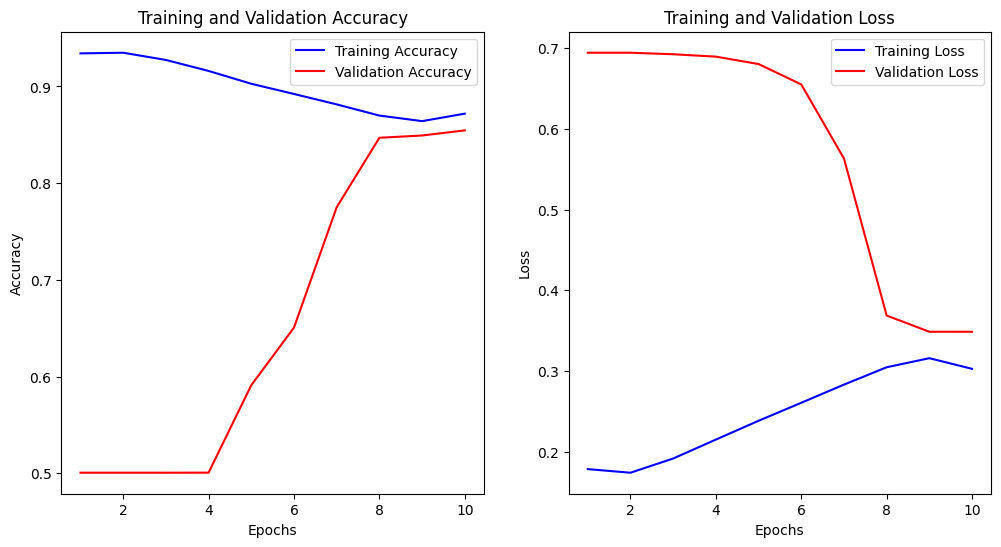

In [30]:
history = lora_bert_0.fit(train_cached, validation_data=test_cached, epochs=10)
plot_training_history(history)

In [31]:
lora_bert_0.evaluate(test_cached)

782/782 [==============================] - 103s 132ms/step - loss: 0.3486 - accuracy: 0.8546


[0.3485821485519409, 0.8545600175857544]

## With Weight Decay Method + C_weight

### Define Dense LoRa and Einsum LoRa Class

In [32]:
import math 

class DenseLoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)
    

    def build(self, input_shape):
        # LoRA weights.
        kernel_shape = self.original_layer.kernel.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )

        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.original_layer.units, self.rank),
            initializer='zeros',
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape=(self.original_layer.units,),
            initializer='zeros',
            trainable=self.trainable,
        )
        super().build(input_shape)

    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(self.A_weight, tf.transpose(inputs))  # Ax
            lora_output = tf.transpose(tf.matmul(self.B_weight, lora_A_output) * self._scale)  # BAx Transpose back to [batch_size, original_layer.units]
            original_output = self.original_layer(inputs) * self.decay_factor

            if training:
                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output + lora_output + self.C_weight #  (1 - self.decay_factor) // 곱하기로도..

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                # Modify lora_output based on decay_factor
                #if tf.not_equal(self.decay_factor, 1.0):
                  #lora_output /= (1 - self.decay_factor) // 곱하기로도..
                return lora_output + self.C_weight 

In [33]:
# EinsumLoraLayer_O
import math
from tensorflow import keras

class EinsumLoraLayer_O(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape= kernel_shape[:-1] + (self.rank,),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank, kernel_shape[-1]) ,
            initializer="zeros",
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape= bias_shape ,
            initializer='zeros',
            trainable=self.trainable,
        )
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.einsum(self.original_layer.equation, inputs , self.A_weight)
            lora_output = tf.matmul(lora_A_output, self.B_weight) * self._scale 
            original_output = self.original_layer(inputs) * self.decay_factor

            if training:
                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output + lora_output + self.C_weight #  (1 - self.decay_factor) // 곱하기로도..

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                # Modify lora_output based on decay_factor
                #if tf.not_equal(self.decay_factor, 1.0):
                  #lora_output /= (1 - self.decay_factor) // 곱하기로도..
                return lora_output + self.C_weight 

In [34]:
#EinsumLoraLayer_QKV
import math
from tensorflow import keras

class EinsumLoraLayer_QKV(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank,) + kernel_shape[1:],
            initializer="zeros",
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape= bias_shape ,
            initializer='zeros',
            trainable=self.trainable,
        )
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(inputs, tf.transpose(self.A_weight)) #xA
            lora_output = tf.einsum(self.original_layer.equation, lora_A_output , self.B_weight) * self._scale  # BAx Transpose back to [batch_size, original_layer.units]
            original_output = self.original_layer(inputs) * self.decay_factor

            if training:
                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output + lora_output + self.C_weight #  (1 - self.decay_factor) // 곱하기로도..

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                # Modify lora_output based on decay_factor
                #if tf.not_equal(self.decay_factor, 1.0):
                  #lora_output /= (1 - self.decay_factor) // 곱하기로도..
                return lora_output + self.C_weight 


### Creating LoRA Bert  Epoch 10, batch size = 32 rank = 32 


In [35]:
epochs = 10
batch_size = 32
total_iteration= int(epochs * (dataset_size / batch_size))  # Total number of iterations for the decay

In [36]:
# 원본 모델 우선 가져오기 
lora_bert_2 = tf.keras.models.load_model("./model/bert-small-IMDB-original-model")
lora_bert_backbone = lora_bert_2.get_layer('bert_backbone_1')

In [37]:
def replace_transformerblocks_with_lora(bert_backbone, layer_name, total_iteration, rank=32, alpha=32, input_shape = (None, 256, 128)):
    # Access the specific transformer layer within the bert_backbone
    transformer_layer = bert_backbone.get_layer(layer_name)


    # Replace feedforward_intermediate_dense, feedforward_output_dense 
    #transformer_layer._feedforward_intermediate_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_intermediate_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    #transformer_layer._feedforward_output_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_output_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    # Replace query, key, value, and output dense layers with LoRA layers
    self_attention_layer = transformer_layer._self_attention_layer

    self_attention_layer._output_dense = EinsumLoraLayer_O(
        original_layer=self_attention_layer._output_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._query_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._query_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._value_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._value_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._key_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._key_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )

    # Build the modified layers
    #transformer_layer._feedforward_intermediate_dense.build(input_shape)
    #transformer_layer._feedforward_output_dense.build(input_shape)
    #문제해결 전까지 FREEZE
    transformer_layer._feedforward_intermediate_dense.trainable = False 
    transformer_layer._feedforward_output_dense.trainable = False

    self_attention_layer._output_dense.build(input_shape)
    self_attention_layer._query_dense.build(input_shape)
    self_attention_layer._key_dense.build(input_shape)
    self_attention_layer._value_dense.build(input_shape)





In [38]:


# Apply LoRA to pooled_dense layer
#pooled_dense_layer = lora_bert_backbone.get_layer('pooled_dense')
#pooled_dense_layer = DenseLoraLayer(
#    original_layer=lora_bert_backbone.get_layer('pooled_dense'),
#    rank=32,
#    alpha=32,
#    total_iteration=total_iteration,
#    trainable=True
#)
#pooled_dense_layer.build((None, 256, 128))

pooled_dense_layer = lora_bert_backbone.get_layer('pooled_dense')
pooled_dense_layer.trainable = False 





In [39]:

# Apply LoRA Layers to Transformer Encoders and Freeze Layer Norm layer in Transformer Encoder 

num_transformer_layers = 4
for i in range(num_transformer_layers):
    layer_name = f"transformer_layer_{i}"
    transformer_layer = lora_bert_backbone.get_layer(layer_name) # 해당 레이어를 가져옵니다.

    # Set the self-attention layer normalization to be non-trainable
    # transformer_layer._self_attention_layer_norm 레이어의 모든 가중치를 학습 불가능하게 설정
    for weight in transformer_layer._self_attention_layer_norm.weights:
        weight._trainable = False
    for weight in transformer_layer._feedforward_layer_norm.weights:
        weight._trainable = False


    # LoRA 레이어 적용
    replace_transformerblocks_with_lora(lora_bert_backbone, layer_name, total_iteration)


In [40]:
# Freeze Logits 
logits = lora_bert_2.get_layer('logits')
logits.trainable = False



# Freeze Bert Backbone (Except Transformer Encdoer, PooledDense )
token_embedding_layer = lora_bert_backbone.get_layer('token_embedding')
position_embedding_layer = lora_bert_backbone.get_layer('position_embedding')
segment_embedding_layer = lora_bert_backbone.get_layer('segment_embedding')
embeddings_layer_norm_layer = lora_bert_backbone.get_layer('embeddings_layer_norm')

token_embedding_layer.trainable = False
position_embedding_layer.trainable = False
segment_embedding_layer.trainable = False
embeddings_layer_norm_layer.trainable = False


In [41]:
import numpy as np
import tensorflow as tf

# 모델의 각 레이어를 순회하며 파라미터 수를 계산
for layer in lora_bert_backbone.layers:
    trainable_count = np.sum([tf.size(w).numpy() for w in layer.trainable_weights])
    non_trainable_count = np.sum([tf.size(w).numpy() for w in layer.non_trainable_weights])

    print(f"Layer: {layer.name}")
    print(f"  Trainable parameters: {trainable_count}")
    print(f"  Non-trainable parameters: {non_trainable_count}")


Layer: token_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: token_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 15627264
Layer: segment_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: position_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 262144
Layer: segment_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 1024
Layer: add_2
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: embeddings_layer_norm
  Trainable parameters: 0.0
  Non-trainable parameters: 1024
Layer: embeddings_dropout
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: padding_mask
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: transformer_layer_0
  Trainable parameters: 135168
  Non-trainable parameters: 3150344
Layer: transformer_layer_1
  Trainable parameters: 135168
  Non-trainable parameters: 3150344
Layer: transformer_layer_2
  Trainable parameters: 135168
  Non-

In [42]:
lora_bert_2.summary()

Model: "bert_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ segment_ids (InputLayer)                      │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bert_backbone_1 (BertBackbone)                │ {sequence_output: (None, None, 512),   │      29,296,160 │
│                                               │ pooled_output: (None, 512)}            │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                           │ (None, 512)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,026 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 29,297,186 (111.76 MB)

 Trainable params: 540,672 (2.06 MB)

 Non-trainable params: 28,756,514 (109.70 MB)

In [43]:
model_name =  "bert_small_en_uncased"
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    model_name,
    sequence_length=256,
)
batch_size = 32
train_cached = (
    training_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)
test_cached = (
    validation_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)

In [44]:

lora_bert_2.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),  
    #jit_compile=True,
    metrics=["accuracy"],
)

Epoch 1/10
782/782 [==============================] - 390s 480ms/step - loss: 0.1774 - accuracy: 0.9336 - val_loss: 0.6945 - val_accuracy: 0.5007
Epoch 2/10
782/782 [==============================] - 298s 381ms/step - loss: 0.1759 - accuracy: 0.9327 - val_loss: 0.6955 - val_accuracy: 0.5007
Epoch 3/10
782/782 [==============================] - 169s 216ms/step - loss: 0.1920 - accuracy: 0.9264 - val_loss: 0.6964 - val_accuracy: 0.5007
Epoch 4/10
782/782 [==============================] - 167s 213ms/step - loss: 0.2117 - accuracy: 0.9179 - val_loss: 0.7060 - val_accuracy: 0.5007
Epoch 5/10
782/782 [==============================] - 168s 215ms/step - loss: 0.2336 - accuracy: 0.9061 - val_loss: 0.7348 - val_accuracy: 0.5007
Epoch 6/10
782/782 [==============================] - 167s 213ms/step - loss: 0.2603 - accuracy: 0.8921 - val_loss: 0.7689 - val_accuracy: 0.5007
Epoch 7/10
782/782 [==============================] - 168s 215ms/step - loss: 0.2852 - accuracy: 0.8806 - val_loss: 0.7918 -

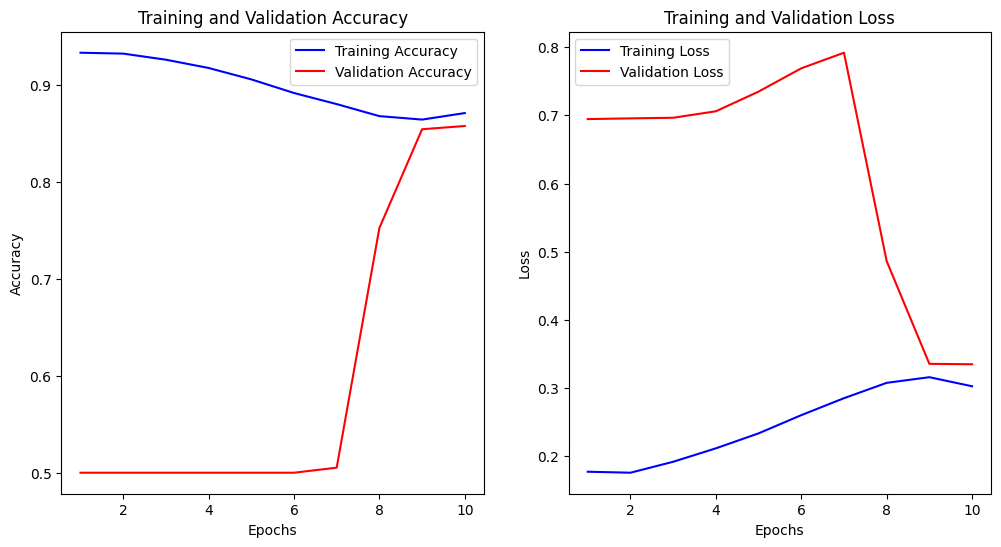

In [45]:
history = lora_bert_2.fit(train_cached, validation_data=test_cached, epochs=10)
plot_training_history(history)

In [46]:
lora_bert_2.evaluate(test_cached)

782/782 [==============================] - 49s 62ms/step - loss: 0.3350 - accuracy: 0.8581


[0.3349620997905731, 0.8580800294876099]

## With Weight Decay Method + C_weight + Noise 

### Define Dense LoRa and Einsum LoRa Class

In [47]:
import math 

class DenseLoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)
    

    def build(self, input_shape):
        # LoRA weights.
        kernel_shape = self.original_layer.kernel.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )

        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.original_layer.units, self.rank),
            initializer='zeros',
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape=(self.original_layer.units,),
            initializer='zeros',
            trainable=self.trainable,
        )
        super().build(input_shape)

    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(self.A_weight, tf.transpose(inputs))  # Ax
            lora_output = tf.transpose(tf.matmul(self.B_weight, lora_A_output) * self._scale)  # BAx Transpose back to [batch_size, original_layer.units]

            #lora_output *= (1 - self.decay_factor) # 멘토링 때 나온 의견

            if training:
                original_output = self.original_layer(inputs)
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                self.current_step.assign_add(1)

                return original_output * self.decay_factor + (inputs @ noise) + lora_output + self.C_weight

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                return lora_output + self.C_weight



In [48]:
# EinsumLoraLayer_O
import math
from tensorflow import keras

class EinsumLoraLayer_O(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape= kernel_shape[:-1] + (self.rank,),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank, kernel_shape[-1]) ,
            initializer="zeros",
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape= bias_shape ,
            initializer='zeros',
            trainable=self.trainable,
        )
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable
            
            lora_A_output = tf.einsum(self.original_layer.equation, inputs , self.A_weight)
            lora_output = tf.matmul(lora_A_output, self.B_weight) * self._scale 
            
            if training:
                # Calculate the linear decay factor
                if self.current_step < self.start_step:
                    self.decay_factor.assign(1.0)  # Decay has not started yet
                elif self.current_step > self.end_step:
                    self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
                else:
                # Linear decay between start_step and end_step
                    self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))
                

                # Matrix multiplication for A and B weights with inputs
                original_output = self.original_layer(inputs) * self.decay_factor
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output * self.decay_factor + tf.einsum(self.original_layer.equation, inputs , noise ) + lora_output + self.C_weight

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                return lora_output + self.C_weight 

In [49]:
#EinsumLoraLayer_QKV
import math
from tensorflow import keras

class EinsumLoraLayer_QKV(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank,) + kernel_shape[1:],
            initializer="zeros",
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape= bias_shape ,
            initializer='zeros',
            trainable=self.trainable,
        )
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable
            
            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(inputs, tf.transpose(self.A_weight)) #xA
            lora_output = tf.einsum(self.original_layer.equation, lora_A_output , self.B_weight) * self._scale  # BAx Transpose back to [batch_size, original_layer.units]
            
            if training:
                # Calculate the linear decay factor
                if self.current_step < self.start_step:
                    self.decay_factor.assign(1.0)  # Decay has not started yet
                elif self.current_step > self.end_step:
                    self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
                else:
                # Linear decay between start_step and end_step
                    self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))
                

                # Matrix multiplication for A and B weights with inputs
                original_output = self.original_layer(inputs) * self.decay_factor
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output * self.decay_factor +  tf.einsum(self.original_layer.equation, inputs , noise ) + lora_output + self.C_weight 

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                return lora_output + self.C_weight 

### Creating LoRA Bert  Epoch 10, batch size = 32 rank = 32 


In [50]:
epochs = 10
batch_size = 32
total_iteration= int(epochs * (dataset_size / batch_size))  # Total number of iterations for the decay

In [51]:
# 원본 모델 우선 가져오기 
lora_bert_3 = tf.keras.models.load_model("./model/bert-small-IMDB-original-model")
lora_bert_backbone = lora_bert_3.get_layer('bert_backbone_1')

In [52]:
def replace_transformerblocks_with_lora(bert_backbone, layer_name, total_iteration, rank=32, alpha=32, input_shape = (None, 256, 128)):
    # Access the specific transformer layer within the bert_backbone
    transformer_layer = bert_backbone.get_layer(layer_name)


    # Replace feedforward_intermediate_dense, feedforward_output_dense 
    #transformer_layer._feedforward_intermediate_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_intermediate_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    #transformer_layer._feedforward_output_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_output_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    # Replace query, key, value, and output dense layers with LoRA layers
    self_attention_layer = transformer_layer._self_attention_layer

    self_attention_layer._output_dense = EinsumLoraLayer_O(
        original_layer=self_attention_layer._output_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._query_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._query_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._value_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._value_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._key_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._key_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )

    # Build the modified layers
    #transformer_layer._feedforward_intermediate_dense.build(input_shape)
    #transformer_layer._feedforward_output_dense.build(input_shape)
    #문제해결 전까지 FREEZE
    transformer_layer._feedforward_intermediate_dense.trainable = False 
    transformer_layer._feedforward_output_dense.trainable = False

    self_attention_layer._output_dense.build(input_shape)
    self_attention_layer._query_dense.build(input_shape)
    self_attention_layer._key_dense.build(input_shape)
    self_attention_layer._value_dense.build(input_shape)





In [53]:


# Apply LoRA to pooled_dense layer
#pooled_dense_layer = lora_bert_backbone.get_layer('pooled_dense')
#pooled_dense_layer = DenseLoraLayer(
#    original_layer=lora_bert_backbone.get_layer('pooled_dense'),
#    rank=32,
#    alpha=32,
#    total_iteration=total_iteration,
#    trainable=True
#)
#pooled_dense_layer.build((None, 256, 128))

pooled_dense_layer = lora_bert_backbone.get_layer('pooled_dense')
pooled_dense_layer.trainable = False 





In [54]:

# Apply LoRA Layers to Transformer Encoders and Freeze Layer Norm layer in Transformer Encoder 

num_transformer_layers = 4
for i in range(num_transformer_layers):
    layer_name = f"transformer_layer_{i}"
    transformer_layer = lora_bert_backbone.get_layer(layer_name) # 해당 레이어를 가져옵니다.

    # Set the self-attention layer normalization to be non-trainable
    # transformer_layer._self_attention_layer_norm 레이어의 모든 가중치를 학습 불가능하게 설정
    for weight in transformer_layer._self_attention_layer_norm.weights:
        weight._trainable = False
    for weight in transformer_layer._feedforward_layer_norm.weights:
        weight._trainable = False


    # LoRA 레이어 적용
    replace_transformerblocks_with_lora(lora_bert_backbone, layer_name, total_iteration)


In [55]:
# Freeze Logits 
logits = lora_bert_3.get_layer('logits')
logits.trainable = False



# Freeze Bert Backbone (Except Transformer Encdoer, PooledDense )
token_embedding_layer = lora_bert_backbone.get_layer('token_embedding')
position_embedding_layer = lora_bert_backbone.get_layer('position_embedding')
segment_embedding_layer = lora_bert_backbone.get_layer('segment_embedding')
embeddings_layer_norm_layer = lora_bert_backbone.get_layer('embeddings_layer_norm')

token_embedding_layer.trainable = False
position_embedding_layer.trainable = False
segment_embedding_layer.trainable = False
embeddings_layer_norm_layer.trainable = False


In [56]:
import numpy as np
import tensorflow as tf

# 모델의 각 레이어를 순회하며 파라미터 수를 계산
for layer in lora_bert_backbone.layers:
    trainable_count = np.sum([tf.size(w).numpy() for w in layer.trainable_weights])
    non_trainable_count = np.sum([tf.size(w).numpy() for w in layer.non_trainable_weights])

    print(f"Layer: {layer.name}")
    print(f"  Trainable parameters: {trainable_count}")
    print(f"  Non-trainable parameters: {non_trainable_count}")


Layer: token_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: token_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 15627264
Layer: segment_ids
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: position_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 262144
Layer: segment_embedding
  Trainable parameters: 0.0
  Non-trainable parameters: 1024
Layer: add_3
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: embeddings_layer_norm
  Trainable parameters: 0.0
  Non-trainable parameters: 1024
Layer: embeddings_dropout
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: padding_mask
  Trainable parameters: 0.0
  Non-trainable parameters: 0.0
Layer: transformer_layer_0
  Trainable parameters: 135168
  Non-trainable parameters: 3150344
Layer: transformer_layer_1
  Trainable parameters: 135168
  Non-trainable parameters: 3150344
Layer: transformer_layer_2
  Trainable parameters: 135168
  Non-

In [57]:
lora_bert_3.summary()

Model: "bert_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ segment_ids (InputLayer)                      │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bert_backbone_1 (BertBackbone)                │ {sequence_output: (None, None, 512),   │      29,296,160 │
│                                               │ pooled_output: (None, 512)}            │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                           │ (None, 512)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,026 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 29,297,186 (111.76 MB)

 Trainable params: 540,672 (2.06 MB)

 Non-trainable params: 28,756,514 (109.70 MB)

In [58]:
model_name =  "bert_small_en_uncased"
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    model_name,
    sequence_length=256,
)
batch_size = 32
train_cached = (
    training_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)
test_cached = (
    validation_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)

In [59]:

lora_bert_3.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),  
    #jit_compile=True,
    metrics=["accuracy"],
)

Epoch 1/10
782/782 [==============================] - 203s 236ms/step - loss: 0.1847 - accuracy: 0.9299 - val_loss: 0.6962 - val_accuracy: 0.5007
Epoch 2/10
782/782 [==============================] - 179s 229ms/step - loss: 0.2533 - accuracy: 0.8982 - val_loss: 0.7000 - val_accuracy: 0.5007
Epoch 3/10
782/782 [==============================] - 179s 229ms/step - loss: 0.3351 - accuracy: 0.8552 - val_loss: 0.6943 - val_accuracy: 0.5007
Epoch 4/10
782/782 [==============================] - 179s 229ms/step - loss: 0.3758 - accuracy: 0.8324 - val_loss: 0.6352 - val_accuracy: 0.5288
Epoch 5/10
782/782 [==============================] - 230s 295ms/step - loss: 0.3828 - accuracy: 0.8305 - val_loss: 0.4506 - val_accuracy: 0.8001
Epoch 6/10
782/782 [==============================] - 179s 229ms/step - loss: 0.3736 - accuracy: 0.8366 - val_loss: 0.3591 - val_accuracy: 0.8427
Epoch 7/10
782/782 [==============================] - 178s 228ms/step - loss: 0.3229 - accuracy: 0.8618 - val_loss: 0.3380 -

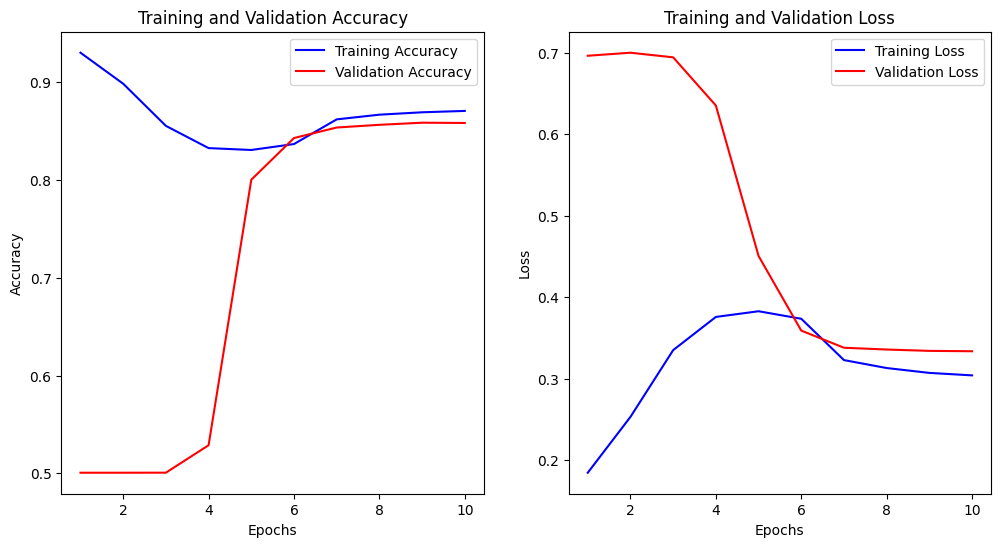

In [60]:
history = lora_bert_3.fit(train_cached, validation_data=test_cached, epochs=10)
plot_training_history(history)

In [61]:
lora_bert_3.evaluate(test_cached)

216/782 [=======>......................] - ETA: 33s - loss: 0.3244 - accuracy: 0.8575

KeyboardInterrupt: 

## With Weight Decay Method + Noise 

### Define Dense LoRa and Einsum LoRa Class

In [ ]:
import math 

class DenseLoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)
    

    def build(self, input_shape):
        # LoRA weights.
        kernel_shape = self.original_layer.kernel.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )

        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.original_layer.units, self.rank),
            initializer='zeros',
            trainable=self.trainable,
        )

        super().build(input_shape)

    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(self.A_weight, tf.transpose(inputs))  # Ax
            lora_output = tf.transpose(tf.matmul(self.B_weight, lora_A_output) * self._scale)  # BAx Transpose back to [batch_size, original_layer.units]

            #lora_output *= (1 - self.decay_factor) # 멘토링 때 나온 의견

            if training:
                original_output = self.original_layer(inputs)
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                self.current_step.assign_add(1)

                return original_output * self.decay_factor + (inputs @ noise) + lora_output 

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                return lora_output 



In [ ]:
# EinsumLoraLayer_O
import math
from tensorflow import keras

class EinsumLoraLayer_O(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape= kernel_shape[:-1] + (self.rank,),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank, kernel_shape[-1]) ,
            initializer="zeros",
            trainable=self.trainable,
        )
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable
            
            lora_A_output = tf.einsum(self.original_layer.equation, inputs , self.A_weight)
            lora_output = tf.matmul(lora_A_output, self.B_weight) * self._scale 
            
            if training:
                # Calculate the linear decay factor
                if self.current_step < self.start_step:
                    self.decay_factor.assign(1.0)  # Decay has not started yet
                elif self.current_step > self.end_step:
                    self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
                else:
                # Linear decay between start_step and end_step
                    self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))
                

                # Matrix multiplication for A and B weights with inputs
                original_output = self.original_layer(inputs) * self.decay_factor
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output * self.decay_factor + tf.einsum(self.original_layer.equation, inputs , noise ) + lora_output 

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                return lora_output 

In [ ]:
#EinsumLoraLayer_QKV
import math
from tensorflow import keras

class EinsumLoraLayer_QKV(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        #trainable=False, 이 변수가 텐서플로우의 자동 미분 및 최적화 과정에 의해 업데이트되지 않는다는 뜻
        #수동으로 업데이트될 수 있습니다. 예를 들어, 반복문 안에서 이 변수의 값을 업데이트하는 로직을 작성할 수 있음!
        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)


    def build(self, inputs_shape):

        kernel_shape = self.original_layer.kernel.shape
        bias_shape = self.original_layer.bias.shape
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, kernel_shape[0]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )
        
        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.rank,) + kernel_shape[1:],
            initializer="zeros",
            trainable=self.trainable,
        )
        super().build(inputs_shape)  



    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable
            
            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(inputs, tf.transpose(self.A_weight)) #xA
            lora_output = tf.einsum(self.original_layer.equation, lora_A_output , self.B_weight) * self._scale  # BAx Transpose back to [batch_size, original_layer.units]
            
            if training:
                # Calculate the linear decay factor
                if self.current_step < self.start_step:
                    self.decay_factor.assign(1.0)  # Decay has not started yet
                elif self.current_step > self.end_step:
                    self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
                else:
                # Linear decay between start_step and end_step
                    self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))
                

                # Matrix multiplication for A and B weights with inputs
                original_output = self.original_layer(inputs) * self.decay_factor
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                # Increment the step counter
                self.current_step.assign_add(1)

                return original_output * self.decay_factor +  tf.einsum(self.original_layer.equation, inputs , noise ) + lora_output 

            else:
                # 추론 모드에서는 LoRA 출력만 반환
                return lora_output 

### Creating LoRA Bert  Epoch 10, batch size = 32 rank = 32 


In [ ]:
epochs = 10
batch_size = 32
total_iteration= int(epochs * (dataset_size / batch_size))  # Total number of iterations for the decay

In [ ]:
# 원본 모델 우선 가져오기 
lora_bert_4 = tf.keras.models.load_model("./model/bert-small-IMDB-original-model")
lora_bert_backbone = lora_bert_4.get_layer('bert_backbone_1')

In [ ]:
def replace_transformerblocks_with_lora(bert_backbone, layer_name, total_iteration, rank=32, alpha=32, input_shape = (None, 256, 128)):
    # Access the specific transformer layer within the bert_backbone
    transformer_layer = bert_backbone.get_layer(layer_name)


    # Replace feedforward_intermediate_dense, feedforward_output_dense 
    #transformer_layer._feedforward_intermediate_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_intermediate_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    #transformer_layer._feedforward_output_dense = DenseLoraLayer(
    #    original_layer=transformer_layer._feedforward_output_dense,
    #    rank=rank,
    #    alpha=alpha,
    #    total_iteration=total_iteration,
    #    trainable=True
    #)

    # Replace query, key, value, and output dense layers with LoRA layers
    self_attention_layer = transformer_layer._self_attention_layer

    self_attention_layer._output_dense = EinsumLoraLayer_O(
        original_layer=self_attention_layer._output_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._query_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._query_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._value_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._value_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )
    self_attention_layer._key_dense = EinsumLoraLayer_QKV(
        original_layer=self_attention_layer._key_dense,
        rank=rank,
        alpha=alpha,
        total_iteration=total_iteration,
        trainable=True
    )

    # Build the modified layers
    #transformer_layer._feedforward_intermediate_dense.build(input_shape)
    #transformer_layer._feedforward_output_dense.build(input_shape)
    #문제해결 전까지 FREEZE
    transformer_layer._feedforward_intermediate_dense.trainable = False 
    transformer_layer._feedforward_output_dense.trainable = False

    self_attention_layer._output_dense.build(input_shape)
    self_attention_layer._query_dense.build(input_shape)
    self_attention_layer._key_dense.build(input_shape)
    self_attention_layer._value_dense.build(input_shape)





In [ ]:

# Apply LoRA Layers to Transformer Encoders and Freeze Layer Norm layer in Transformer Encoder 

num_transformer_layers = 4
for i in range(num_transformer_layers):
    layer_name = f"transformer_layer_{i}"
    transformer_layer = lora_bert_backbone.get_layer(layer_name) # 해당 레이어를 가져옵니다.

    # Set the self-attention layer normalization to be non-trainable
    # transformer_layer._self_attention_layer_norm 레이어의 모든 가중치를 학습 불가능하게 설정
    for weight in transformer_layer._self_attention_layer_norm.weights:
        weight._trainable = False
    for weight in transformer_layer._feedforward_layer_norm.weights:
        weight._trainable = False


    # LoRA 레이어 적용
    replace_transformerblocks_with_lora(lora_bert_backbone, layer_name, total_iteration)


In [ ]:
# Freeze Logits 
logits = lora_bert_4.get_layer('logits')
logits.trainable = False



# Freeze Bert Backbone (Except Transformer Encdoer, PooledDense )
token_embedding_layer = lora_bert_backbone.get_layer('token_embedding')
position_embedding_layer = lora_bert_backbone.get_layer('position_embedding')
segment_embedding_layer = lora_bert_backbone.get_layer('segment_embedding')
embeddings_layer_norm_layer = lora_bert_backbone.get_layer('embeddings_layer_norm')

token_embedding_layer.trainable = False
position_embedding_layer.trainable = False
segment_embedding_layer.trainable = False
embeddings_layer_norm_layer.trainable = False


In [ ]:
import numpy as np
import tensorflow as tf

# 모델의 각 레이어를 순회하며 파라미터 수를 계산
for layer in lora_bert_backbone.layers:
    trainable_count = np.sum([tf.size(w).numpy() for w in layer.trainable_weights])
    non_trainable_count = np.sum([tf.size(w).numpy() for w in layer.non_trainable_weights])

    print(f"Layer: {layer.name}")
    print(f"  Trainable parameters: {trainable_count}")
    print(f"  Non-trainable parameters: {non_trainable_count}")


In [ ]:
lora_bert_4.summary()

In [ ]:
model_name =  "bert_small_en_uncased"
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    model_name,
    sequence_length=256,
)
batch_size = 32
train_cached = (
    training_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)
test_cached = (
    validation_data
    .map(preprocessor)  # Apply the preprocessor
    .batch(batch_size)  # Batch the data
    .cache()  # Cache the data
    .prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for efficiency
)

In [ ]:

lora_bert_4.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),  
    #jit_compile=True,
    metrics=["accuracy"],
)

In [ ]:
history = lora_bert_4.fit(train_cached, validation_data=test_cached, epochs=10)
plot_training_history(history)

In [ ]:
lora_bert_4.evaluate(test_cached)